In [1]:

import regex as re
import pandas as pd
import numpy as np
from termcolor import colored
from urllib.request import urlopen
import json
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [5]:
min_price = 100
max_price = 5000
lapse = 50

#for i in range(min_price, max_price, lapse):
 #   print(i)

In [7]:
%pwd 
%cd c:\\Users\\Lenovo\\Flask apps\\House-price-prediction\\

c:\Users\Lenovo\Flask apps\House-price-prediction


In [10]:
MAIN_DF_PATH = r'Dataset\calgary_cleaned_rentals_dataset.csv'
df = pd.read_csv(MAIN_DF_PATH)

In [12]:
df.head()

,rented,availability,a,city,community,latitude,longitude,link,type,price,beds,sq_feet,baths,cats,dogs,sq_feet2,price2,beds2,baths2,utility_heat,utility_electricity,utility_water,utility_cable,utility_internet
0,Not-Rented,Immediate,2000-01-01,Calgary,Manchester,51.002873,-114.068828,/ab/calgary/rentals/apartment/1-bedroom/manchester/468894,Apartment,580.0,1,NaN,1,0,0,NaN,NaN,0,0.0,0,0,0,0,0
1,Not-Rented,Immediate,2000-01-01,Calgary,Downtown,51.047811,-114.059262,/ab/calgary/rentals/apartment/studio/downtown/472999,Apartment,580.0,studio,NaN,1,0,0,NaN,NaN,0,0.0,1,1,1,0,0
2,Not-Rented,Immediate,2000-01-01,Calgary,Cliff Bungalow,51.036696,-114.074492,/ab/calgary/rentals/apartment/studio/cliff-bungalow/357976,Apartment,525.0,studio,420,1,0,0,NaN,NaN,0,0.0,1,1,1,0,0
3,Not-Rented,May 01,2022-05-01,Calgary,Thorncliffe,51.107160,-114.071470,/ab/calgary/rentals/apartment/3-bedrooms/thorncliffe/131827,Apartment,500.0,3,1100 sft,1,0,0,NaN,NaN,0,0.0,1,1,1,0,0
4,Not-Rented,Immediate,2000-01-01,Calgary,Downtown,51.047297,-114.082807,/ab/calgary/rentals/apartment/1-bedroom/downtown/477769,Apartment,960.0,1,NaN,1,0,0,NaN,NaN,0,0.0,0,0,0,0,0


In [14]:

cols_to_drop = ['availability', 'city']

In [14]:
df.head(2)

,availability,a,city,community,latitude,longitude,link,type,price,beds,sq_feet,baths,cats,dogs,utility_heat,utility_electricity,utility_water,utility_cable,utility_internet,available_month
0,Immediate,2000-01-01 00:00:00,Calgary,Cliff Bungalow,51.036696,-114.074492,/ab/calgary/rentals/apartment/studio/cliff-bungalow/357976,Apartment,525,0,420,1.0,0,0,1,1,1,0,0,1.0
1,May 01,2022-05-01 00:00:00,Calgary,Thorncliffe,51.107160,-114.071470,/ab/calgary/rentals/apartment/3-bedrooms/thorncliffe/131827,Apartment,500,3,1100,1.0,0,0,1,1,1,0,0,5.0


In [6]:
df.loc[:, 'price'] = df.loc[:, 'price'].apply(lambda x : int(x))
df.loc[:, 'sq_feet'] = df.loc[:, 'sq_feet'].apply(lambda x : int(x))

In [16]:
df['type'].unique()

array(['Apartment', 'Shared', 'Basement', 'Condo', 'Loft', 'House',
       'Main Floor', 'Townhouse'], dtype=object)

In [26]:
model_lin = sm.OLS.from_formula("price ~ beds", data=df[df['type']=='Shared'])
result_lin = model_lin.fit()
result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.627
Date:                Sat, 09 Apr 2022   Prob (F-statistic):              0.205
Time:                        15:05:40   Log-Likelihood:                -799.31
No. Observations:                 121   AIC:                             1603.
Df Residuals:                     119   BIC:                             1608.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    730.6763     31.602     23.121      0.000     668.101     793.251
beds         -18.2843     14.336     -1.275      0.205     -46.670      10.102
==============================================================================
Omnibus:                       48.230   Durbin-Watson:                   2.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.644
Skew:                           1.586   Prob(JB):                     2.84e-26
Kurtosis:                       6.644   Cond. No.                         4.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
result_lin.rsquared

0.0019008302111493958

### Decision Tree

In [40]:

# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

import plotly.express as px
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

In [84]:
X = df.loc[:, x_cols]
y = df.loc[:, 'price']

In [63]:
len(enc.fit_transform(df[['community']]).toarray()[0])

202

In [67]:
len(df.community.unique())

203

In [15]:
val = None
if re.findall('\d', val): 
    print('this one')
else:
    print('that one')

TypeError: expected string or buffer

In [85]:
x_cols = ['community', 'type', 'beds', 'sq_feet', 'baths', 'cats',
 'dogs', 'utility_heat', 'utility_electricity', 'utility_water', 
 'utility_cable', 'utility_internet']

df_x = df.loc[:, x_cols]

#perform one-hot encoding on 'team' column 
encoder_df1 = pd.DataFrame(enc.fit_transform(df[['community']]).toarray(), columns = enc.categories_)
encoder_df2 = pd.DataFrame(enc.fit_transform(df[['type']]).toarray(), columns = enc.categories_)


#merge one-hot encoded columns back with original DataFrame
final_df = df_x.join(encoder_df1).join(encoder_df2)
final_df.drop(columns=['community', 'type'], inplace=True)
#final_df


In [86]:
X = final_df
y = df.loc[:, 'price']

In [87]:

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)

DecisionTreeRegressor()

In [103]:
df.loc[:, 'price_per_sq'] = [df.loc[i, 'price'] / df.loc[i, 'sq_feet'] for i in range(len(df))]

In [113]:
column = 'type'

df_1 = df.groupby([column]).agg({'price_per_sq': 'mean'}).rename(columns={'price_per_sq': 'avg_price_per_sq'})
df_2 = df.groupby([column]).agg({'price_per_sq': 'median'}).rename(columns={'price_per_sq': 'median_price_per_sq'})
df_exp = pd.concat([df_1, df_2], axis=1)
df_exp.sort_values(by='median_price_per_sq', inplace=True)
df_exp.reset_index(inplace=True)

In [118]:
import plotly.graph_objects as go

xs = df_exp.type
fig = go.Figure(data=[
    go.Bar(name='Median', x=xs, y=df_exp['median_price_per_sq']),
    go.Bar(name='Average', x=xs, y=df_exp['avg_price_per_sq'])
])
# Change the bar mode
fig.update_layout(barmode='group')
# Customize aspect
fig.update_traces( marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.7)

In [102]:
importance_df = pd.DataFrame({'field': columns, 'importance': importance})
importance_df.sort_values(by='importance')

,field,importance
182,"(Strathcona Park,)",0.000000
131,"(Palliser,)",0.000000
154,"(Rosemont,)",0.000000
180,"(St Andrews Heights,)",0.000000
72,"(Fairview,)",0.000000
...,...,...
214,"(Basement,)",0.024661
8,utility_cable,0.025328
219,"(Shared,)",0.105664
1,sq_feet,0.248202


Feature beds, Score: 0.02
Feature sq_feet, Score: 0.25
Feature baths, Score: 0.32
Feature cats, Score: 0.0
Feature dogs, Score: 0.01
Feature utility_heat, Score: 0.0
Feature utility_electricity, Score: 0.02
Feature utility_water, Score: 0.0
Feature utility_cable, Score: 0.03
Feature utility_internet, Score: 0.02
Feature ('Abbeydale',), Score: 0.0
Feature ('Acadia',), Score: 0.0
Feature ('Albert Park',), Score: 0.0
Feature ('Altadore',), Score: 0.0
Feature ('Applewood',), Score: 0.0
Feature ('Arbour Lake',), Score: 0.0
Feature ('Aspen Woods',), Score: 0.0
Feature ('Auburn Bay',), Score: 0.0
Feature ('Banff Trail',), Score: 0.0
Feature ('Bankview',), Score: 0.0
Feature ('Bayview',), Score: 0.0
Feature ('Beddington',), Score: 0.0
Feature ('Belmont',), Score: 0.0
Feature ('Beltline',), Score: 0.01
Feature ('Bowness',), Score: 0.0
Feature ('Braeside',), Score: 0.0
Feature ('Brentwood',), Score: 0.0
Feature ('Bridgeland',), Score: 0.0
Feature ('Bridlewood',), Score: 0.0
Feature ('Britannia',

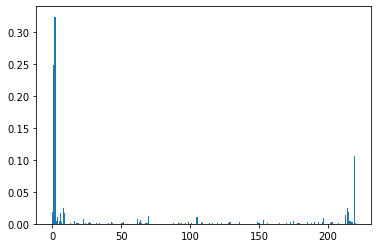

In [98]:
importance = model.feature_importances_
columns = final_df.columns

for i,v in enumerate(importance):
	print(f'Feature {columns[i]}, Score: {np.round(importance[i], decimals=2)}')
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [44]:
communities_with_at_least_n_records = 5
df_exp = df.groupby(['community']).count()[['city']].sort_values(by='city').reset_index()
df_exp2 = pd.merge(left=df_exp, right=df[['community', 'price']], on='community')

df_exp3 = df_exp2[df_exp2['city']>communities_with_at_least_n_records]
fig = px.box(df_exp3, x="community", y="price",
             title="Box plot of popular comminities prices (right-most = most popular)")
fig.show()

In [69]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(X)

OneHotEncoder()

In [ ]:

from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()